In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# constants
G = 6.674e-11 # m^3 / kg s^2
yr = 31536000 # s
sm = 1.989e30 # kg
au = 1.496e11 # m
# initialize values
T = 100
dt = 0.01
v1 = [[np.sqrt((2 * G * sm) / (2 * au)), 0.5]]
v2 = [[-np.sqrt((2 * G * sm) / (2 * au)), 0.5]]
v3 = [[0, -1]]
traj1 = [[-5, 1]]
traj2 = [[-5, -1]]
traj3 = [[10, 0]]

In [3]:
for i in range(0, T * 100, int(dt * 100)):
    # move trajectory
    traj1.append([traj1[-1][0] + dt * v1[-1][0], traj1[-1][1] + dt * v1[-1][1]])
    traj2.append([traj2[-1][0] + dt * v2[-1][0], traj2[-1][1] + dt * v2[-1][1]])
    traj3.append([traj3[-1][0] + dt * v3[-1][0], traj3[-1][1] + dt * v3[-1][1]])
    # update velocity
    dv1x = ((G * au) / ((traj1[-1][0] - traj2[-1][0]) ** 2) + (G * au) / ((traj1[-1][0] - traj3[-1][0]) ** 2))
    dv1y = ((G * au) / ((traj1[-1][1] - traj2[-1][1]) ** 2) + (G * au) / ((traj1[-1][1] - traj3[-1][1]) ** 2))
    v1.append([traj1[-1][0] + dv1x, traj1[-1][1] + dv1y])
    dv2x = ((G * au) / ((traj1[-1][0] - traj2[-1][0]) ** 2) + (G * au) / ((traj2[-1][0] - traj3[-1][0]) ** 2))
    dv2y = ((G * au) / ((traj1[-1][1] - traj2[-1][1]) ** 2) + (G * au) / ((traj2[-1][1] - traj3[-1][1]) ** 2))
    v2.append([traj2[-1][0] + dv2x, traj2[-1][1] + dv2y])
    dv3x = ((G * au) / ((traj3[-1][0] - traj2[-1][0]) ** 2) + (G * au) / ((traj1[-1][0] - traj3[-1][0]) ** 2))
    dv3y = ((G * au) / ((traj3[-1][1] - traj2[-1][1]) ** 2) + (G * au) / ((traj1[-1][1] - traj3[-1][1]) ** 2))
    v3.append([traj3[-1][0] + dv3x, traj3[-1][1] + dv3y])

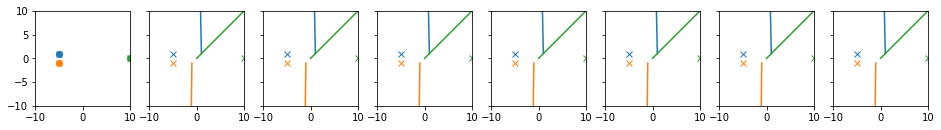

In [4]:
fig, ax = plt.subplots(1,8, figsize=(16,2.0), sharey=True, sharex=True)
for i in range(0, 8):
    max_t = i*(len(traj1)//8)
    if not max_t == 0:
        ax[i].plot(traj1[:max_t][0], traj1[:max_t][1], label='M1')
        ax[i].plot(traj2[:max_t][0], traj2[:max_t][1], label='M2')
        ax[i].plot(traj3[:max_t][0], traj3[:max_t][1], label='M3')
    # add final points
    ax[i].plot(traj1[max_t][0], traj1[max_t][1], marker='o', color='tab:blue')
    ax[i].plot(traj2[max_t][0], traj2[max_t][1], marker='o', color='tab:orange')
    ax[i].plot(traj3[max_t][0], traj3[max_t][1], marker='o', color='tab:green')
    # add initial points
    ax[i].plot(traj1[0][0], traj1[0][1], marker='x', color='tab:blue')
    ax[i].plot(traj2[0][0], traj2[0][1], marker='x', color='tab:orange')
    ax[i].plot(traj3[0][0], traj3[0][1], marker='x', color='tab:green')
    ax[i].set_xlim(-10.0, 10.0)
    ax[i].set_ylim(-10.0, 10.0)
    ax[i].set_aspect(1)
plt.show()